# Machine Learning: lidando com dados de muitas dimensões

Nesse projeto vamos analizar um conjunto de dados que representam 569 que possuem o resultado de 33 exames para dizer se um câncer é maligno ou benigno. A ideia desse estudo é explorar e analisar os dados para determinar quais exames podem ser desconsiderados sem perdermos acurácia em nossas previsões.


In [1]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import random 
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


## Lendo e explorando os dados
 Os 33 exames possuem variáveis numéricas associadas, enquanto que o diagnostico é dado por variáveis categóricas B e M, que indicam se o câncer é maligno ou benigno.


In [3]:
resultados_exames = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv")
resultados_exames

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,...,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115,0.158771
565,926682,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,...,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,...,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,...,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400,NaN


In [4]:
SEED =123143
valores_exames = resultados_exames.drop(columns=['id','diagnostico'])
diagnostico = resultados_exames.diagnostico
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames,diagnostico, random_state=SEED)

In [5]:
#Mostrando quantos dados de cada coluna não são números
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [6]:
# nossa base de dados tem 569 linhas
419/569
#ou seja, mais de 73% dos dados da coluna exame_33 não são números
valores_exames_v1=valores_exames.drop(columns='exame_33')

In [7]:
SEED =123143
random.seed(SEED)
valores_exames = resultados_exames.drop(columns=['id','diagnostico'])
diagnostico = resultados_exames.diagnostico
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1,diagnostico, test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x,treino_y)
print("Resultado da classificação %.2f%%" % (classificador.score(teste_x, teste_y)* 100))

Resultado da classificação 92.40%


In [8]:
classificador_bobo=DummyClassifier(strategy="most_frequent")
classificador_bobo.fit(treino_x,treino_y)
print("Resultado da classificação boba %.2f%%" % (classificador_bobo.score(teste_x, teste_y)* 100))

Resultado da classificação boba 66.67%


In [9]:
concatenado = pd.concat([diagnostico, valores_exames_v1.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(concatenado, id_vars="diagnostico", 
                 var_name="exames",
                 value_name="valores")

dados_plot.tail()

,diagnostico,exames,valores
5685,M,exame_10,0.1726
5686,M,exame_10,0.1752
5687,M,exame_10,0.1590
5688,M,exame_10,0.2397
5689,B,exame_10,0.1587


In [10]:
concatenado.tail()

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10
564,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726
565,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752
566,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,0.05302,0.1590
567,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397
568,B,7.76,24.54,47.92,103.78,181.0,0.05263,0.04362,0.00000,0.00000,0.1587


O Standard Score de uma amostra x é calculado como

$z=\frac{x-\mu}{\sigma}$

De modo que $\mu$ significa a média das amostras de treino ou zero se with_mean=False. O $\sigma$ representa o desvio padrão das amostras de treino.


## Visualizando dados com o Violin Plot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

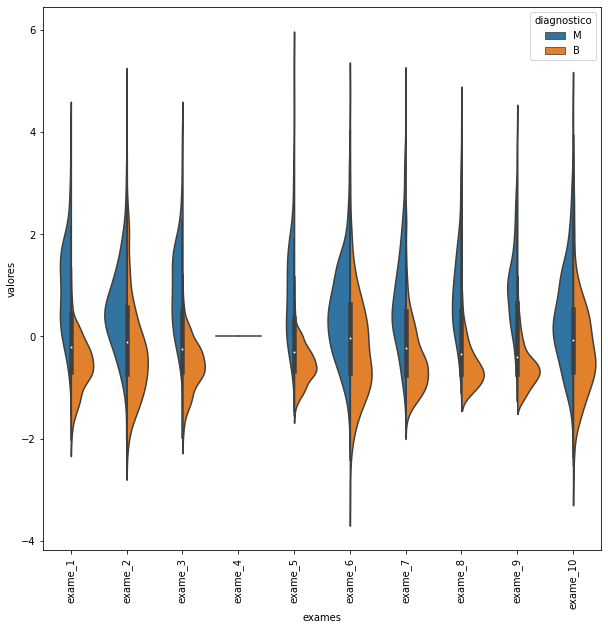

In [11]:
padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_transformados=padronizador.transform(valores_exames_v1)
valores_exames_transformados = pd.DataFrame(data=valores_exames_transformados,columns=valores_exames_v1.keys())
concatenado = pd.concat([diagnostico, valores_exames_transformados.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(concatenado, id_vars="diagnostico", 
                 var_name="exames",
                 value_name="valores")

plt.figure(figsize=(10,10))
sns.violinplot(x = "exames", y = "valores", 
               hue = "diagnostico", data = dados_plot,split=True)
plt.xticks(rotation = 90)

In [12]:
def grafico_violino(valores, inicio, fim):

    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                         var_name="exames",
                         value_name="valores")

    plt.figure(figsize=(10,10))

    sns.violinplot(x = "exames", y = "valores", hue = "diagnostico", 
                    data = dados_plot, split = True)

    plt.xticks(rotation = 90)

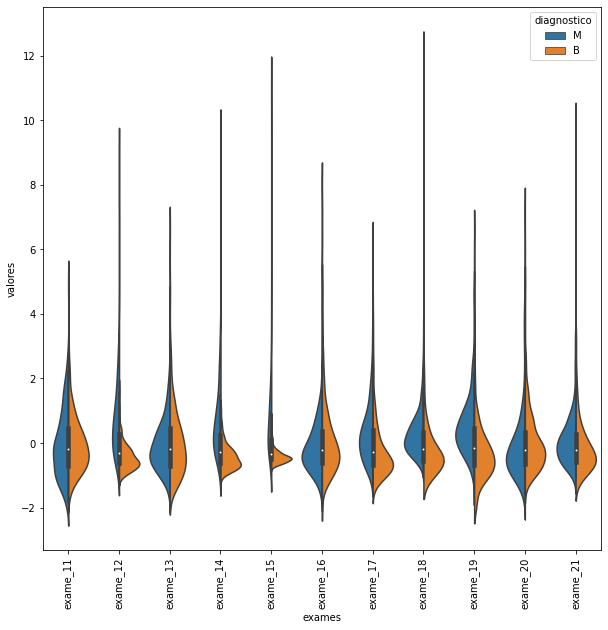

In [13]:
grafico_violino(valores_exames_transformados, 10, 21)

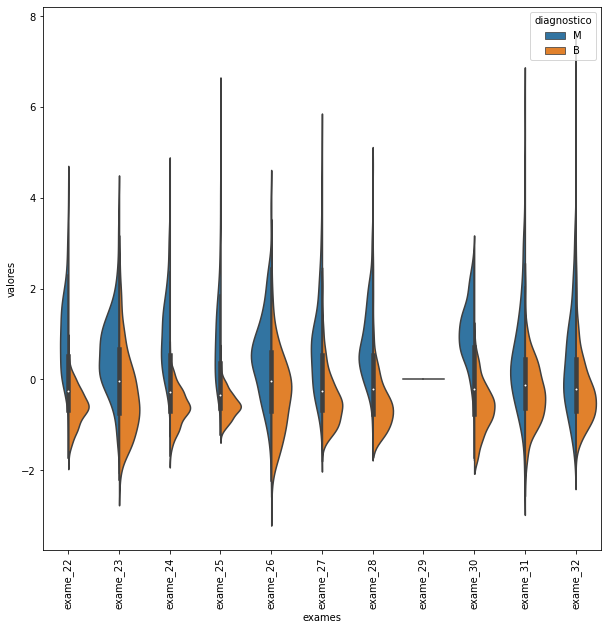

In [14]:
grafico_violino(valores_exames_transformados, 21, 32)

Com esses plots em formatos de violino conseguimos verificar a distribuição dos valores dos valores atribuidos aos exames considerando cada um dos diagnósticos. 

Uma informação importante que conseguimos tirar desses gráficos é que, mesmo após reescalr os dados, existem exames que tem valores que ou são iguais ou variam muito pouco. Com isso parece razoável deletar as colunas correspondentes aos exames 4 e 29.

In [15]:
valores_exames = valores_exames_transformados.drop(columns=['exame_29','exame_4'])
variaveis_numericas =valores_exames

In [16]:
def classificar(valores):
    SEED = 123143
    random.seed(SEED)

    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size = 0.3)

    classificador = RandomForestClassifier(n_estimators = 100)
    classificador.fit(treino_x, treino_y)
    classificador.fit(treino_x, treino_y)
    print("Resultado da classificação %.2f%%" % (classificador.score(teste_x, teste_y)* 100))

In [17]:
classificar(valores_exames)

Resultado da classificação 93.57%


## Aula 03. Dados correlacionados

Para começar a entender como os nosso dados se correlacionam, vamos imprimir a matriz de correlação.

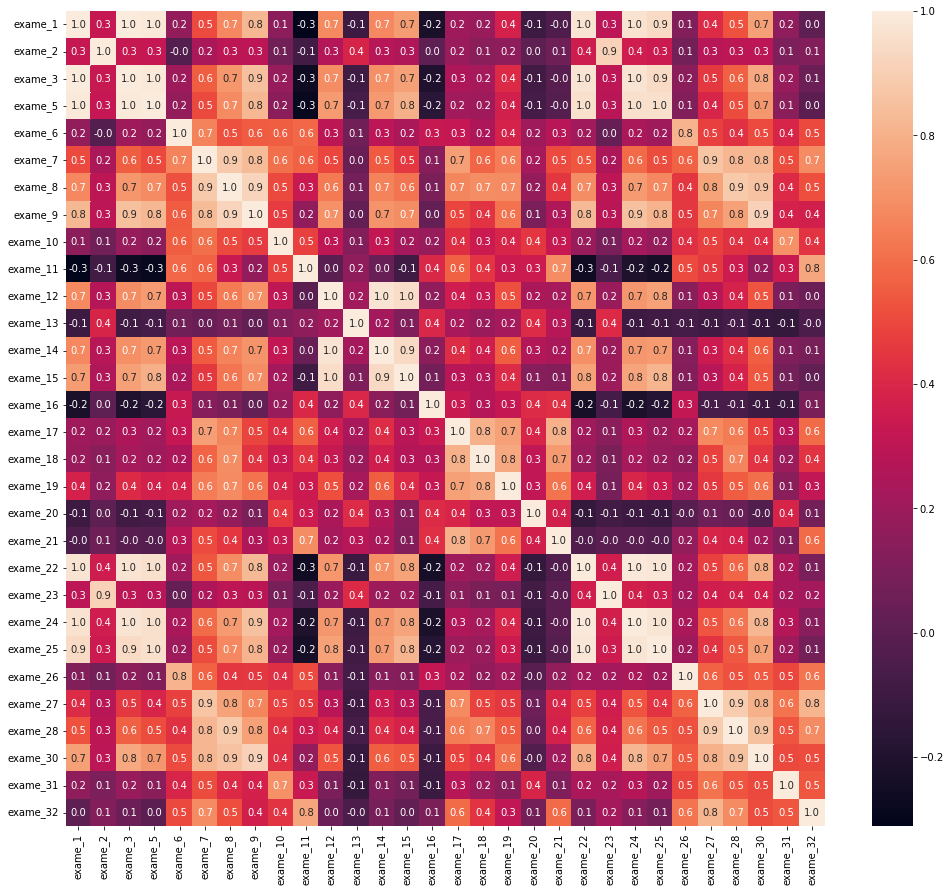

In [18]:
#matriz de correlação
matriz_de_correlacao=valores_exames.corr()

plt.figure(figsize = (17, 15))

sns.heatmap(matriz_de_correlacao, annot = True, fmt = ".1f")
plt.show()

In [19]:
matriz_de_correlacao_alta = matriz_de_correlacao[matriz_de_correlacao>0.99 ]
matriz_de_correlacao_alta.head()
triangulo_superior=np.triu(np.ones(matriz_de_correlacao.shape),k=1).astype(bool)

df_triangulo=matriz_de_correlacao.where(triangulo_superior)

df=df_triangulo[abs(df_triangulo)>0.99].dropna(axis = 0, how = 'all')
df.dropna(axis = 1, how = 'all')

,exame_3,exame_24
exame_1,0.997855,NaN
exame_22,NaN,0.993708


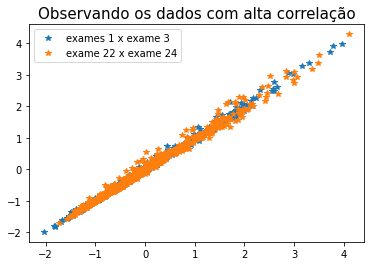

In [20]:
plt.plot(valores_exames['exame_1'],valores_exames['exame_3'],'*',label="exames 1 x exame 3")
plt.plot(valores_exames['exame_22'],valores_exames['exame_24'],'*', label="exame 22 x exame 24")

plt.legend(fontsize=10)
plt.title("Observando os dados com alta correlação", fontsize=15)
plt.show()


Com isso vemos que o exame_1 possui alta correlação com o exame_3 e o exame_22 possui alta correção com o exame_24. Portanto vamos retirar as colunas exame_24 e exame_1

In [21]:
valores_exames.drop(columns=['exame_1','exame_24'],inplace=True,errors='ignore')

## Selecionando as Features mais importantes 
Para selecionar as features mais importantes, ou seja, os exames mais importantes para dar um diagnóstico corretos vamos usar o modelo RFECV,que significa Recursive Feature Elimination with cross-validation. Ou seja, é um modelo que vai eliminar as features menos importantes de forma recursiva e, para decidir quais features são mais importantes, também faz uso do método de validação cruzada.

In [22]:

SEED= 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, 
                                                        diagnostico,
                                                        test_size = 0.3,
                                                        random_state=SEED)

classificador = RandomForestClassifier(n_estimators=100, random_state=SEED)
classificador.fit(treino_x, treino_y)
selecionador_rfecv = RFECV(estimator = classificador, cv = 5, step = 1, scoring="accuracy")
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)
previsto=classificador.predict(teste_rfecv)

RandomForestClassifier(random_state=1234)

## Matriz de Confusão

A matriz e confusão compara os dados previstos com os de teste, informando quando tivemos um verdadeiro positivo, verdadeiro negativo, falso positivo e falso negativo nas clasificações.


Resultado da classificação 93.57%


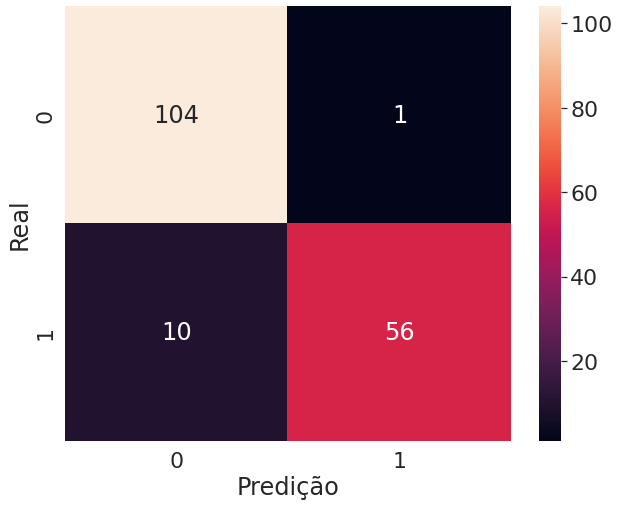

In [28]:
matriz_confusao = confusion_matrix(teste_y,previsto)
plt.figure(figsize = (10, 8))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfecv,teste_y)*100))

In [24]:
exames_selecionados=list(filter(None,list(valores_exames.columns*selecionador_rfecv.support_)))
print("O modelo rfecv selecionou {} exames: \n{}".format(len(exames_selecionados),exames_selecionados))

O modelo rfecv selecionou 19 exames: 
['exame_2', 'exame_3', 'exame_5', 'exame_6', 'exame_7', 'exame_8', 'exame_9', 'exame_12', 'exame_14', 'exame_15', 'exame_22', 'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30', 'exame_31', 'exame_32']


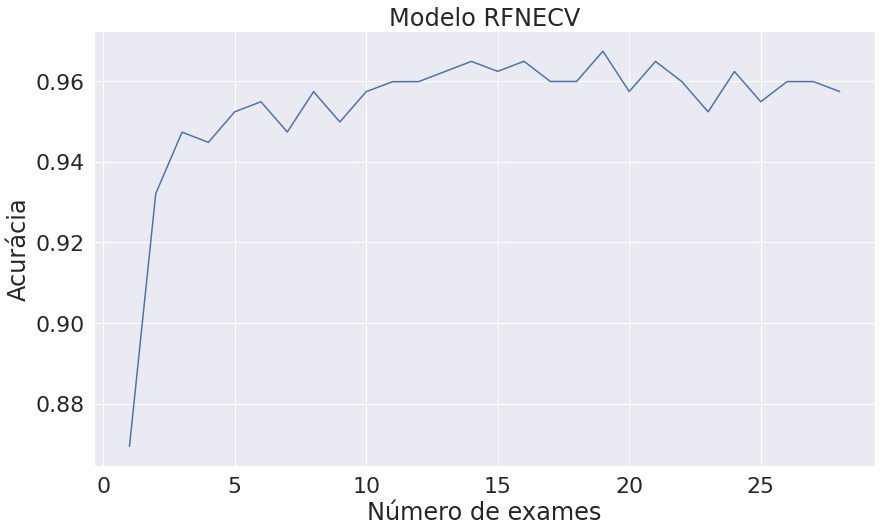

In [25]:
plt.figure(figsize = (14, 8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")

#resultados obtidos pelo cross validation
cv_results=selecionador_rfecv.cv_results_['mean_test_score']
plt.plot(range(1, len(selecionador_rfecv.cv_results_['mean_test_score']) + 1), selecionador_rfecv.cv_results_['mean_test_score'])
plt.title("Modelo RFNECV")
plt.show()

In [26]:
valores_exames_rfecv = selecionador_rfecv.transform(valores_exames)
valores_exames_rfecv.shape


(569, 19)

#Redução da dimensionalidade com o t-SNE para visualização dos dados

Quando estamos trabalhando com muitas dimensões e queremos vizualizar os dados, podemos usar alguns truques como o t-distributed stochastic neighbourhood embedding (t-SNE), que transforma os dados de modo a concentrar o máximo de informações possível na dimensão escolhida. 



Escolhemos 2 dimensões, e após a redução da dimensionalidade, conseguimos observar os clusters de diagnósticos M e B.

Como o t-SNE é um algoritmo randomico, ou seja, depende de variáveis aleatórias, precisamos escolher uma seed para obtermos sempre os mesmos resultados quando rodarmos o programa.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


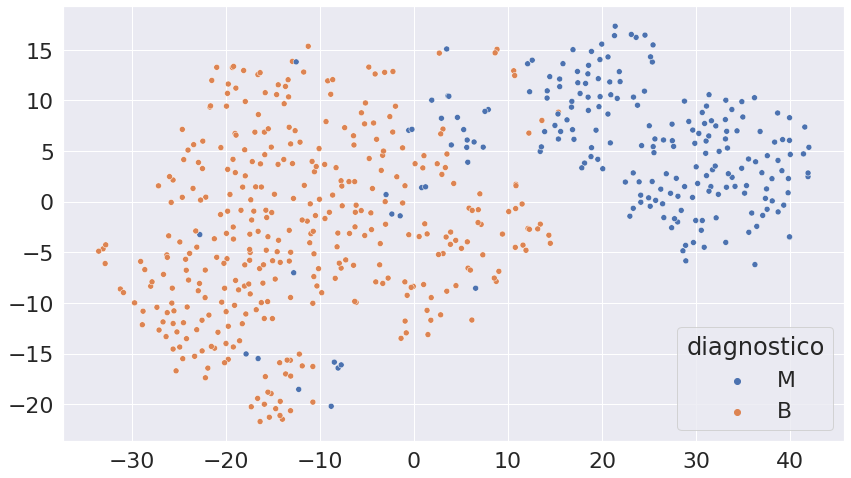

In [27]:
SEED=5
tsne = TSNE(n_components = 2,random_state=SEED)
valores_exames_tsne= tsne.fit_transform(valores_exames)
plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_tsne[:,0] , y = valores_exames_tsne[:,1], hue = diagnostico)